In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns; sns.set_context('notebook')
from datetime import datetime
import numpy as np

import os

In [2]:
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
root = "Battery_Data/degraded_battery_cycles/"
degraded_battery_cycles = os.listdir(root)
filtered_list = {}
Degraded_Battery_Set = []
for f in degraded_battery_cycles:
    if f[-2:] == ".p" and ("Degraded_Battery_Set" not in f):
        filtered_list[int(f[1])] = f
for i in range(1, 10):
    if "discharge" in filtered_list[i]:
        print(filtered_list[i])
        data = pickle.load(open(root + filtered_list[i], 'rb'), encoding='latin1')
        fix_naming = {}
        for name in data.keys():
            if name == "Current:":
                fix_naming[name[:-1]] = data[name]*-1
            else:
                fix_naming[name[:-1]] = data[name]
        Degraded_Battery_Set.append(fix_naming)

c2_test_discharge.p
c4_random_discharge.p
c6_random_discharge2.p
c8_random_discharge3.p


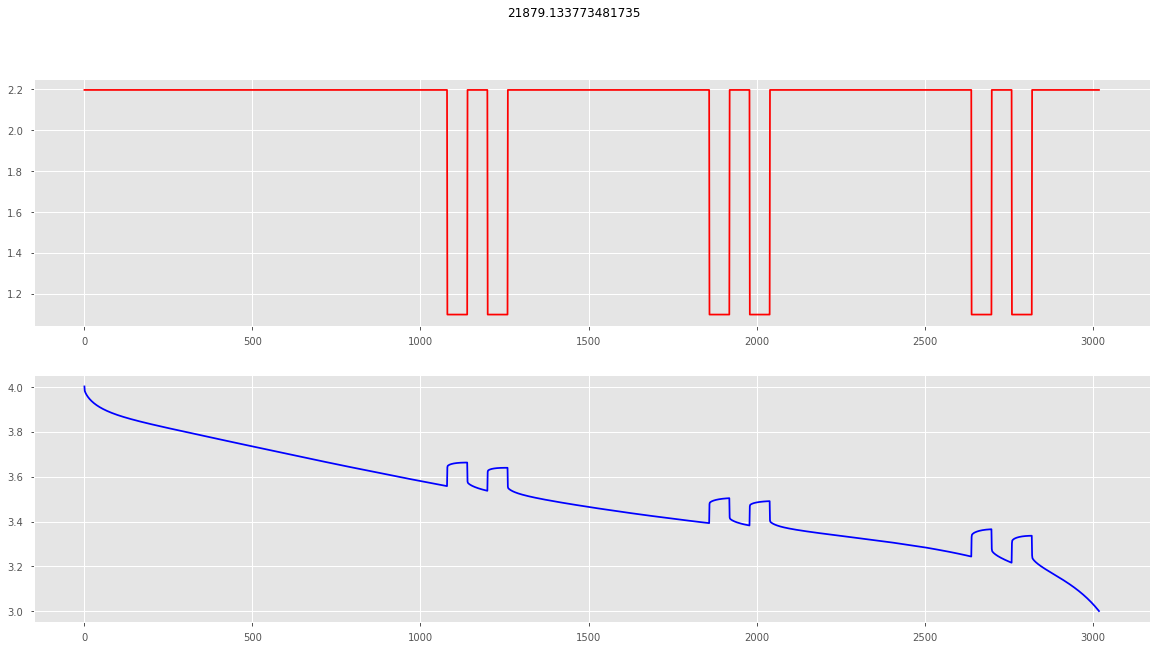

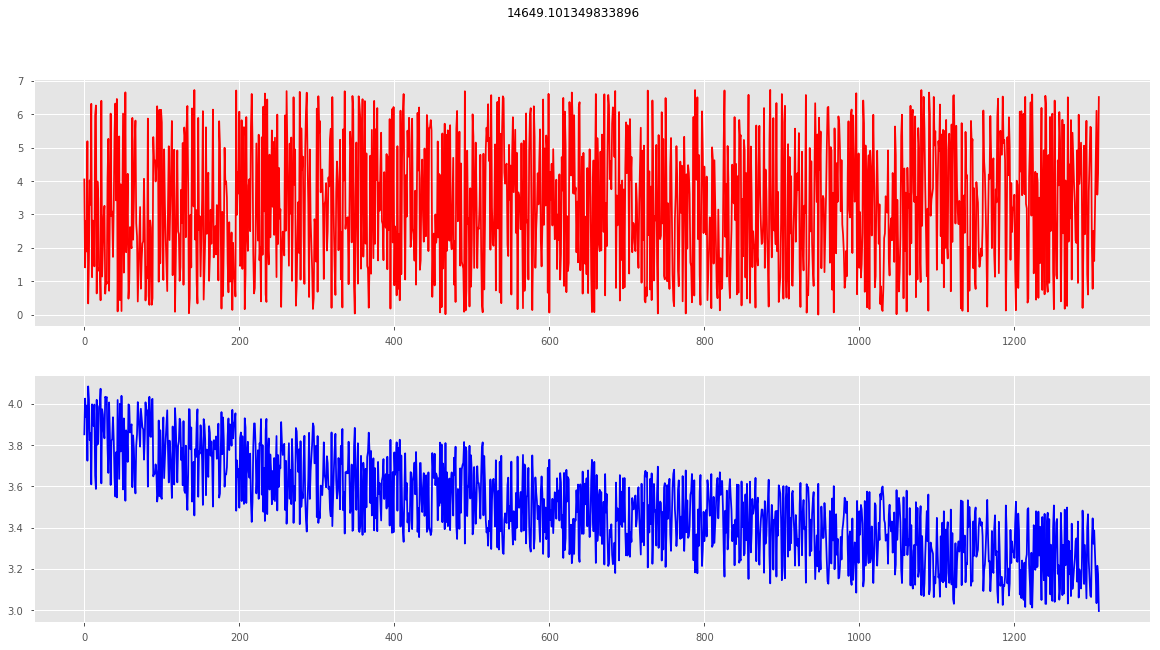

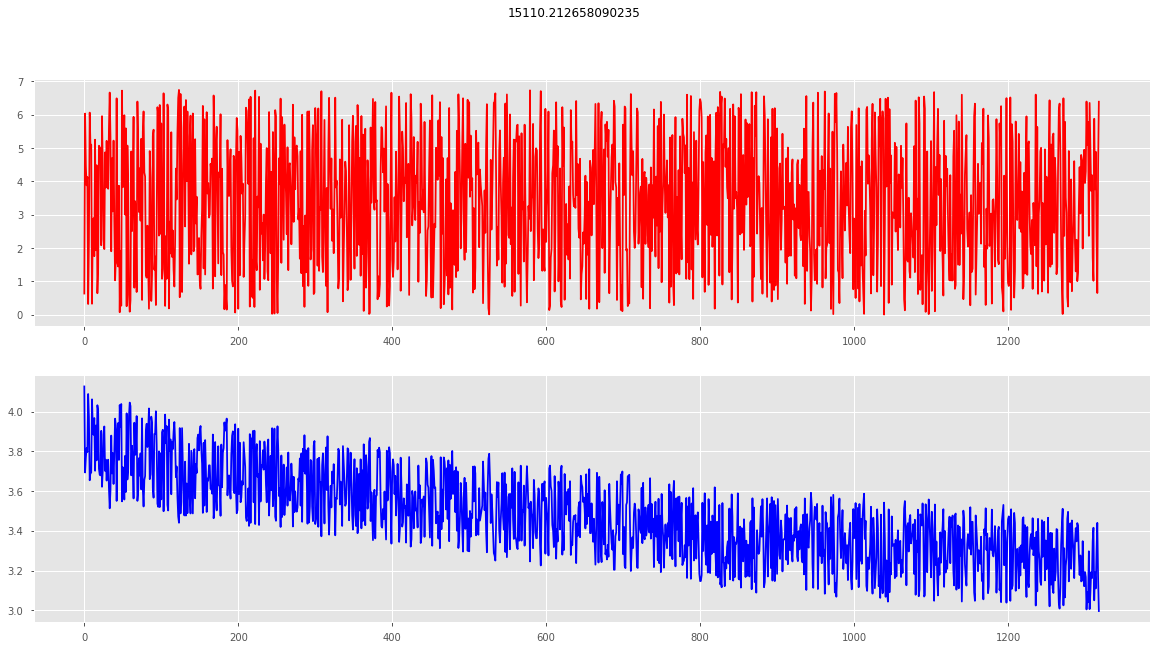

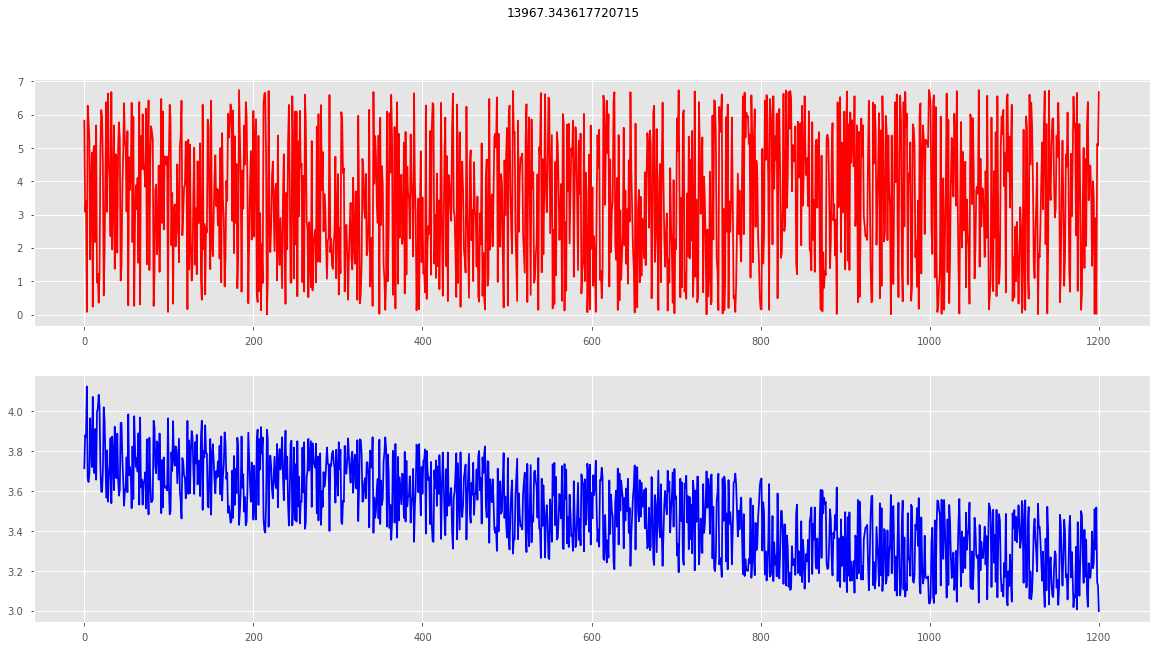

In [9]:
for i, data_set in enumerate(Degraded_Battery_Set):
    matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
    plt.figure()
    seconds = np.ones_like(np.array(data_set['Current'])[0, :])
    C_n = np.sum(np.array(data_set['Current'])[0, :]*seconds*np.array(data_set['Voltage'])[0, :])
    plt.suptitle(C_n)
    plt.subplot(211)
    plt.plot(data_set['Current'].T, 'r')
    plt.subplot(212)
    plt.plot(data_set['Voltage'].T, 'b')
plt.show()

In [10]:
pickle.dump(Degraded_Battery_Set, open(root + "Test_Degraded_Battery_Set.p", 'wb'))